In [1]:
#This section loads the csv file into a numpy data matrix
import numpy as np
import csv
import matplotlib.pyplot as plt

data = [] # Create empty data list

#Load csv file into data --- 
with open('digitData.csv') as csvfile: 
    readCSV = csv.reader(csvfile, delimiter=',')
    for row in readCSV:
        if len(row) != 0:
            data = data + [row]
#---

data =  np.asarray(data) #Convert regular array to numpy array.
print(data)
print("done")

[['label' 'pixel0' 'pixel1' ..., 'pixel781' 'pixel782' 'pixel783']
 ['1' '0' '0' ..., '0' '0' '0']
 ['0' '0' '0' ..., '0' '0' '0']
 ..., 
 ['7' '0' '0' ..., '0' '0' '0']
 ['6' '0' '0' ..., '0' '0' '0']
 ['9' '0' '0' ..., '0' '0' '0']]
done


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18  30 137 137 192  86  72   1
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  13  86 250 254 254 254 254 217 246 151
   32   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  16 179 254 254 254 254 254 254 254 254 254
  231  54  15   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  72 254 254 254 254 254 254 254 254 254 254
  254 254 104   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  61 191 254 254 254 254 254 109  83 19

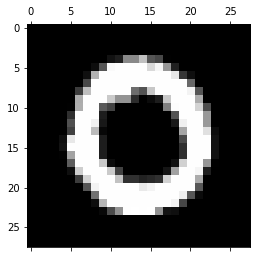

In [2]:
#Cell used to visualize data as a human does

displayPixelValues = data[2][1:]  #Gather all pixel values from first data point

displayPixelValues = np.reshape(displayPixelValues, (-1, 28)) #Reshape data to 28 by 28 array instead of 784 by 1 array
displayPixelValues = displayPixelValues.astype(np.int) #Convert the data into integers from strings
print(displayPixelValues) #Print out array of single digit

plt.matshow(displayPixelValues, fignum=10,cmap=plt.cm.gray) #Make grayscale representation of digit
plt.show() #Show grayscale representation of digit

In [3]:
def sigmoid(x):
    #If overflow error, return small values for zero
    return 1/(1+np.exp(-x))

In [18]:
#np.random.seed(1)

layer0_neurons = 784 #Number of pixels = 784
layer1_neurons = 30 #Number of middle layer neurons. I picked 30 for now
layer2_neurons = 10 #Output neurons here. 
                    #The activation of the output neurons are the "guesses"
#Initialize random weights and biases
layer1_b = np.zeros((layer1_neurons,1))#Initialize layer_1 biases to 0. This is a 784 by 1 matrix
layer1_w = (2*np.random.random((layer1_neurons,layer0_neurons)) - 1) /100 #Initialize layer_1 weights to a value between -.01 and .01 This is a 30 by 784 matrix
layer2_b = np.zeros((layer2_neurons,1)) #Initialize layer_2 biases to 0. This is a 30 by 1 matrix
layer2_w = (2*np.random.random((layer2_neurons,layer1_neurons)) - 1) /100 #Initialize layer_2 weights to to a value between -.01 and .01 This is a 10 by 30 matrix

In [5]:
trainingSize = 100 #Total number of training examples
for d in range(1,trainingSize+1): #
    pixelValues = data[d][1:] #Get pixel values of data
    pixelValues = pixelValues.astype(np.int) #Convert the data from strings to integers
    pixelValues = pixelValues.reshape((784,1)) #Reshape data as a 784 by 1 matrix

    x = pixelValues #Input data
    x = x/255 #map grayscale values (0-255) to a value between 0 and 1 
    z_1 = np.dot(layer1_w,x)+layer1_b #Take dot product of layer_1 and input pixel values
    activation_1 = sigmoid(z_1) #Activation function of z_1. This is the output of layer_1 which is the input to layer_2

    z_2 = np.dot(layer2_w,activation_1)+layer2_b #Take dot product of layer_2 and layer_1 values
    activation_2 = sigmoid(z_2) #Activation function of z_2. This is the output or 'guesses'
    
    print("Digit example %s final layer activation (guesses):" %(d))
    print(activation_2) #Print guesses
    
    #Calculate squared error sum of activation_2
    label = data[d][0].astype(np.int) #Get label of curret datapoint as integer  
    errors = activation_2.copy() #Copy elements of activation_2 into errors
    errors[label][0] = 1 - activation_2[label] #Get error of index of target value
    squaredErrorSum = 0 
    for e in range(errors.size):
        squaredErrorSum += (errors[e][0] ** 2) #Sum up errors and square them
    print("Squared error sum is",squaredErrorSum)
    print('a2:',activation_2)
print()

#print("data0 ",data[1])
test = data[1]

Digit example 1 final layer activation (guesses):
[[ 0.51130213]
 [ 0.49825908]
 [ 0.49740519]
 [ 0.4981211 ]
 [ 0.49475494]
 [ 0.49571108]
 [ 0.49711254]
 [ 0.50670203]
 [ 0.49563328]
 [ 0.50031013]]
Squared error sum is 2.49905269168
a2: [[ 0.51130213]
 [ 0.49825908]
 [ 0.49740519]
 [ 0.4981211 ]
 [ 0.49475494]
 [ 0.49571108]
 [ 0.49711254]
 [ 0.50670203]
 [ 0.49563328]
 [ 0.50031013]]
Digit example 2 final layer activation (guesses):
[[ 0.51138103]
 [ 0.49817293]
 [ 0.49723663]
 [ 0.49829508]
 [ 0.49459936]
 [ 0.49563149]
 [ 0.49673908]
 [ 0.50661554]
 [ 0.49555564]
 [ 0.50035845]]
Squared error sum is 2.47208910231
a2: [[ 0.51138103]
 [ 0.49817293]
 [ 0.49723663]
 [ 0.49829508]
 [ 0.49459936]
 [ 0.49563149]
 [ 0.49673908]
 [ 0.50661554]
 [ 0.49555564]
 [ 0.50035845]]
Digit example 3 final layer activation (guesses):
[[ 0.51121516]
 [ 0.4982603 ]
 [ 0.49724215]
 [ 0.49819418]
 [ 0.4947149 ]
 [ 0.49564618]
 [ 0.49705922]
 [ 0.50665444]
 [ 0.49568411]
 [ 0.50027469]]
Squared error sum

a2: [[ 0.51119284]
 [ 0.49827997]
 [ 0.49737339]
 [ 0.49813894]
 [ 0.49460576]
 [ 0.49582314]
 [ 0.49693269]
 [ 0.50663376]
 [ 0.49560004]
 [ 0.50047522]]
Digit example 41 final layer activation (guesses):
[[ 0.51126712]
 [ 0.49825896]
 [ 0.49716206]
 [ 0.49813416]
 [ 0.494871  ]
 [ 0.49590143]
 [ 0.4968277 ]
 [ 0.50656195]
 [ 0.49555348]
 [ 0.50037768]]
Squared error sum is 2.49441782282
a2: [[ 0.51126712]
 [ 0.49825896]
 [ 0.49716206]
 [ 0.49813416]
 [ 0.494871  ]
 [ 0.49590143]
 [ 0.4968277 ]
 [ 0.50656195]
 [ 0.49555348]
 [ 0.50037768]]
Digit example 42 final layer activation (guesses):
[[ 0.51126788]
 [ 0.49823565]
 [ 0.49722049]
 [ 0.49819216]
 [ 0.49470428]
 [ 0.49562529]
 [ 0.49705019]
 [ 0.50666659]
 [ 0.49568048]
 [ 0.50023619]]
Squared error sum is 2.49866803548
a2: [[ 0.51126788]
 [ 0.49823565]
 [ 0.49722049]
 [ 0.49819216]
 [ 0.49470428]
 [ 0.49562529]
 [ 0.49705019]
 [ 0.50666659]
 [ 0.49568048]
 [ 0.50023619]]
Digit example 43 final layer activation (guesses):
[[ 0.51121

In [74]:
#Three dimensional matrix calculation of forward propogation
#
trainingSize = 1000 #Number of training sample
Xdata = data[1:trainingSize+1,1:] #Get pixel values of data samples
Ydata = data[1:,0].astype(np.int)  #Get labels of each digit an numpy list
Xdata = Xdata.T #Convert data to 3D matrix
Xdata = Xdata.astype(np.int) #Convert values from string to integer
Xdata = Xdata/255 #Remap grayscale values (normalize)
Xdata.shape



(784, 1000)

In [75]:
# FP
z_1 = np.dot(layer1_w,Xdata)+layer1_b
a_1 = sigmoid(z_1)

z_2 = np.dot(layer2_w,a_1)+layer2_b
a_2 = sigmoid(z_2)

print("activation 2:")
print(a_2)

activation 2:
[[ 0.50108035  0.50109531  0.50096456 ...,  0.50118817  0.50100045
   0.50101929]
 [ 0.50351373  0.50346035  0.50351841 ...,  0.50350004  0.50351696
   0.50352145]
 [ 0.50463893  0.50435775  0.5046046  ...,  0.50463986  0.50464072
   0.5044553 ]
 ..., 
 [ 0.5009008   0.50068396  0.500954   ...,  0.50090366  0.50081791
   0.5008785 ]
 [ 0.49560582  0.49553204  0.49563727 ...,  0.49551825  0.49561185
   0.49560689]
 [ 0.49793113  0.49767034  0.49790197 ...,  0.49773905  0.49774871
   0.49777492]]


In [81]:
#Accuracy Calculation

predictions = []
for i in range(trainingSize):
    maxIndex = 0
    maxValue = a_2[0,i]
    for j in range(a_2[:,i].size):
        if(a_2[j,i] > maxValue):
            maxIndex = j
            maxValue = a_2[j,i]
    #print("highest a_2 value for digit",i,": ", maxValue)
    predictions.append(maxIndex)

#print("predictions: ")
#print(predictions)

correct = 0
total = trainingSize+1 #Change to testSize
for i in range(trainingSize):
    if(Ydata[i] == predictions[i]):
        correct+=1
accuracy = round(((correct/total)*100),2)
print(str(accuracy) + '% Accurate')

10.19% Accurate


In [66]:
Xdata.shape
a_2[2,0]

0.50463892584147163

In [10]:
layer1_w.shape

(30, 784)